In [1]:
#Load libraries 

import pandas as pd
import sspa
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
#Load the common cases dataset
df = pd.read_csv('Data/Su_COVID_metabolomics_processed_commoncases.csv', index_col=0)
#df = pd.read_csv('Data/Su_COVID_proteomics_processed_commoncases.csv', index_col=0)

In [57]:
analytes_in_df = df.columns[:-2]

In [58]:
#Metabolomic:
reactome_pathways = sspa.process_gmt("Data/Reactome_Homo_sapiens_pathways_compounds_R84.gmt")

#Proteomic:
#reactome_pathways = sspa.process_reactome('Homo sapiens', infile = 'Data/UniProt2Reactome_All_Levels.txt', download_latest = False, filepath = None)

reactome_pathways

,Pathway_name,2,3,4,5,6,7,8,9,10,...,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503
Pathway_ID,,,,,,,,,,,,,,,,,,,,,
R-HSA-1059683,Interleukin-6 signaling,30616,456216,,,,,,,,...,,,,,,,,,,
R-HSA-109581,Apoptosis,61120,4705,456216,28494,36080,15377,43474,47575,30616,...,,,,,,,,,,
R-HSA-109582,Hemostasis,15366,91144,15377,15378,15379,456215,456216,35366,57895,...,,,,,,,,,,
R-HSA-109606,Intrinsic Pathway for Apoptosis,456216,28494,36080,15377,43474,47575,30616,,,...,,,,,,,,,,
R-HSA-109703,PKB-mediated events,456216,57836,15377,58165,456215,30616,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R-HSA-983695,Antigen activates B Cell Receptor (BCR) leadin...,57540,456216,57836,203600,36080,29108,17815,30616,58456,...,,,,,,,,,,
R-HSA-983705,Signaling by the B Cell Receptor (BCR),57540,11750,456216,29034,57836,58189,203600,29105,36080,...,,,,,,,,,,
R-HSA-983712,Ion channel transport,15365,17544,57613,49552,15377,15378,35475,30616,456216,...,,,,,,,,,,


In [59]:
#https://stackoverflow.com/questions/26977076/pandas-unique-values-multiple-columns
#"ravel() is an array method that returns a view (if possible) of a multidimensional array. The argument 'K' tells the method to flatten the array in the order the elements are stored in the memory"
analytes_in_reactome = pd.unique(reactome_pathways.iloc[:,1:].values.ravel('K'))

In [60]:
analytes_mapping_reactome = list(set(analytes_in_reactome) & set(analytes_in_df)) #set removes duplicates

In [61]:
#Can make a Venn diagram with these results (not a bar graph because of the high numbers of total metabolites in reactome, not a contingency table because no double negative)
print(len(analytes_in_df)) #333 metabolites, 454 proteins
print(len(analytes_in_reactome)) #2393 unique Reactome metabolites, 11596 unique Reactome proteins
print(len(analytes_mapping_reactome)) #78 metabolites in the dataset that map to a reactome pathway, 354 proteins 

333
2393
78


In [62]:
print(( len(analytes_in_df) / len(analytes_in_reactome) ) *100)  #13.92% of the analytes in the df are present in Reactome
print(( len(analytes_mapping_reactome) / len(analytes_in_df) ) *100) # 23.42% of metabolites in the dataset map to a Reactome pathway, 77.97% of proteins

13.915587129126619
23.423423423423422


Get average of the length of Reactome pathways, and then calculate percentage of analytes that map to each Reactome pathway:

In [63]:
pathway_len = []  #length of each Reactome pathway
number_coverage = [] #number of analytes in the dataset for a Reactome pathway if 2 or more analytes from data present
percentage_coverage = [] #pathway coverage with the dataset for a Reactome pathway if 2 or more analytes from data present

for index in range(len(reactome_pathways)):

    #Obtain list of analytes per pathways
    list1 = reactome_pathways.iloc[index,1:]
    list2 = [i for i in list1 if i != '']

    #Get number of analytes present in dataset present in each pathways
    number_mapping = len(list(set(list2) & set(analytes_in_df)))
    #If the number is 2 or over (min number to be in a pathway using sspa kPCA) append to list
    if number_mapping >= 2:
        number_coverage.append(number_mapping)
        #Get the fraction of metabolites mapping to a pathway so you can make a plot
        percentage_coverage.append((number_mapping/len(list2)) * 100)

    #Get length of pathway 
    pathway_len.append(len(list2))
    

print("Average length of Reactome pathway: ", sum(pathway_len) / len(pathway_len), "analytes")
print("Number of pathways that will be detected by sspa: ", len(percentage_coverage))
print("Average analytes present in pathway: ", sum(number_coverage) / len(number_coverage), "analytes")
print("Average pathway coverage: ", sum(percentage_coverage) / len(percentage_coverage), "%")

Average length of Reactome pathway:  13.640366172624237 analytes
Number of pathways that will be detected by sspa:  160
Average analytes present in pathway:  5.125 analytes
Average pathway coverage:  12.772397118617086 %


Note: You remove the root pathways so the number of pathways are not the same here

Metabolomic: <br> 
Average length of Reactome pathway:  13.640366172624237 analytes <br>
Number of pathways that will be detected by sspa:  160 <br>
Average analytes present in pathway:  5.125 analytes <br>
Average pathway coverage:  12.772397118617086 % <br>

Proteomic: <br>
Average length of Reactome pathway:  2598.0 analytes <br>
Number of pathways that will be detected by sspa:  603 <br>
Average analytes present in pathway:  6.200663349917082 analytes <br>
Average pathway coverage:  0.23867064472352328 % <br>

In [65]:
metabolomic_number_coverage #= number_coverage

[2,
 8,
 3,
 10,
 10,
 2,
 2,
 2,
 2,
 3,
 62,
 2,
 4,
 3,
 5,
 10,
 2,
 6,
 11,
 2,
 3,
 2,
 6,
 14,
 2,
 20,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 7,
 3,
 16,
 7,
 8,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 4,
 12,
 9,
 2,
 3,
 4,
 35,
 12,
 10,
 3,
 3,
 2,
 4,
 2,
 5,
 2,
 6,
 2,
 2,
 14,
 6,
 16,
 33,
 4,
 2,
 2,
 2,
 2,
 4,
 2,
 11,
 4,
 7,
 18,
 3,
 5,
 2,
 2,
 2,
 15,
 4,
 17,
 2,
 5,
 2,
 2,
 4,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 16,
 4,
 2,
 3,
 2,
 2,
 4,
 4,
 3,
 4,
 2,
 3,
 2,
 4,
 5,
 2,
 2,
 2,
 4,
 8,
 4,
 2,
 2,
 3,
 2,
 3,
 9,
 8,
 7,
 3,
 5,
 2,
 2,
 2,
 2,
 11,
 2,
 6,
 5,
 3,
 4,
 7,
 4,
 2,
 2]

In [55]:
proteomic_number_coverage #= number_coverage

[14,
 38,
 3,
 4,
 2,
 2,
 4,
 2,
 3,
 3,
 4,
 2,
 6,
 3,
 2,
 4,
 4,
 2,
 2,
 6,
 3,
 3,
 5,
 2,
 4,
 4,
 6,
 2,
 2,
 2,
 4,
 20,
 3,
 27,
 90,
 48,
 2,
 5,
 2,
 3,
 2,
 60,
 4,
 2,
 5,
 3,
 7,
 17,
 3,
 4,
 2,
 5,
 4,
 2,
 2,
 3,
 7,
 3,
 4,
 127,
 3,
 2,
 3,
 5,
 5,
 7,
 4,
 3,
 5,
 2,
 6,
 71,
 4,
 2,
 2,
 3,
 10,
 8,
 3,
 9,
 2,
 7,
 8,
 8,
 9,
 8,
 8,
 8,
 8,
 57,
 4,
 159,
 4,
 5,
 11,
 2,
 7,
 2,
 4,
 2,
 3,
 2,
 9,
 4,
 4,
 7,
 4,
 2,
 2,
 8,
 5,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 5,
 4,
 2,
 5,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 4,
 8,
 3,
 7,
 2,
 3,
 3,
 6,
 2,
 2,
 2,
 2,
 3,
 7,
 3,
 2,
 18,
 16,
 5,
 14,
 3,
 2,
 2,
 5,
 3,
 3,
 2,
 2,
 2,
 2,
 9,
 3,
 3,
 4,
 3,
 4,
 19,
 4,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 9,
 5,
 33,
 4,
 2,
 5,
 3,
 2,
 4,
 2,
 4,
 5,
 2,
 3,
 5,
 2,
 14,
 13,
 22,
 4,
 2,
 2,
 2,
 4,
 4,
 7,
 2,
 2,
 2,
 4,
 5,
 2,
 2,
 2,
 3,
 7,
 3,
 4,
 5,
 4,
 3,
 3,
 2,
 2,
 2,
 4,
 2,
 2,
 5,
 2,
 4,
 3,
 3,
 2,
 2,
 2,
 9,
 34,
 25,
 5,
 2

In [53]:
proteomic_percentage_coverage #= percentage_coverage

[0.5388760585065435,
 1.4626635873749037,
 0.11547344110854503,
 0.15396458814472672,
 0.07698229407236336,
 0.07698229407236336,
 0.15396458814472672,
 0.07698229407236336,
 0.11547344110854503,
 0.11547344110854503,
 0.15396458814472672,
 0.07698229407236336,
 0.23094688221709006,
 0.11547344110854503,
 0.07698229407236336,
 0.15396458814472672,
 0.15396458814472672,
 0.07698229407236336,
 0.07698229407236336,
 0.23094688221709006,
 0.11547344110854503,
 0.11547344110854503,
 0.1924557351809084,
 0.07698229407236336,
 0.15396458814472672,
 0.15396458814472672,
 0.23094688221709006,
 0.07698229407236336,
 0.07698229407236336,
 0.07698229407236336,
 0.15396458814472672,
 0.7698229407236336,
 0.11547344110854503,
 1.0392609699769053,
 3.4642032332563506,
 1.8475750577367205,
 0.07698229407236336,
 0.1924557351809084,
 0.07698229407236336,
 0.11547344110854503,
 0.07698229407236336,
 2.3094688221709005,
 0.15396458814472672,
 0.07698229407236336,
 0.1924557351809084,
 0.11547344110854503

In [17]:
metabolomic_percentage_coverage #= percentage_coverage

[20.0,
 16.3265306122449,
 8.823529411764707,
 12.345679012345679,
 12.345679012345679,
 11.11111111111111,
 4.878048780487805,
 28.57142857142857,
 28.57142857142857,
 4.6875,
 4.1278295605858855,
 15.384615384615385,
 3.9215686274509802,
 10.714285714285714,
 4.464285714285714,
 6.535947712418301,
 14.285714285714285,
 12.76595744680851,
 7.006369426751593,
 12.5,
 14.285714285714285,
 25.0,
 8.955223880597014,
 3.8147138964577656,
 4.25531914893617,
 3.9761431411530817,
 18.181818181818183,
 7.894736842105263,
 1.4925373134328357,
 1.7751479289940828,
 7.6923076923076925,
 33.33333333333333,
 3.79746835443038,
 17.647058823529413,
 5.555555555555555,
 3.75,
 5.405405405405405,
 2.142857142857143,
 3.431372549019608,
 17.647058823529413,
 4.790419161676647,
 5.6000000000000005,
 3.9800995024875623,
 20.0,
 4.444444444444445,
 5.769230769230769,
 1.6666666666666667,
 13.333333333333334,
 8.333333333333332,
 8.695652173913043,
 2.857142857142857,
 3.1578947368421053,
 6.060606060606060

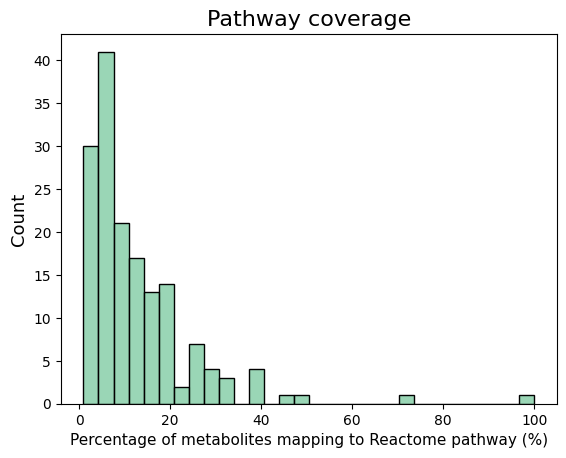

In [19]:
sns.histplot(metabolomic_percentage_coverage, bins = 30,color='#79C99E',edgecolor="k") 

plt.title('Pathway coverage',fontsize=16)
plt.xlabel('Percentage of metabolites mapping to Reactome pathway (%)',fontsize=11)
plt.ylabel('Count',fontsize=13) ;

#plt.savefig( 'Figures/metabolite_pathway_coverage.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')